# PhotoFiTT: Analysis of manually annotated unsynchornised cell populations


- The code reads `.tif` videos, where a dot in the middle of the cell for the same cell in the premitotic rounding across time is expected.  If the cell divides, two dots (separated) with the same label as in the previous frames, are expected for the first frame in which the division occurs. This way, we identify divisions and premitotic rounding tracks.
- The data is assumed to be organised in folders as follows. The Subcategories are the ones that the code uses to display the data. The labels will be identical to the folder name, so the same conditions should always have the same folder name.

   ```   
   -Raw-images (folder)
    |
    |--Biological-replica-date-1 (folder) [Subcaegory-00]
        |
        |--Cell density / UV Ligth / WL 475 light [Subcategory-01] 
           |
           |-- control-condition (folder) [Subcategory-02] 
           |    |  file1.tif
           |    |  file2.tif
           |    |  ...
           |
           |-- condition1 (folder) [Subcategory-02] 
           |    |  file1.tif
           |    |  file2.tif
           |    |  ...
           |
           |-- condition2 (folder) [Subcategory-02] 
           |    |  file1.tif
           |    |  file2.tif
           |    |  ...
        |
        |--Cell density / UV Ligth / WL 475 light [Subcategory-01]
        ...
   ```

## 1. Import required dependencies

In [11]:
import photofitt
import pandas as pd

## 2. Set the paths to the data and the output folders
- `path2images`: The path where the Raw-images are saved. For example "/home/ocb/HardDrive_4TB/PHX/SYNCHRO/Raw-images"
- `path2results`: The path where the notebook will save all the results. Once the cell activity is calculated, a CSV file together with the plots will be stored there.
- `frame_rate`: The time frame in the videos given in minutes (e.g., `frame_rate = 4`)

In [ ]:
path2masks = ""
path2results = ""
frame_rate = 4

## Prepare the directory to save the results
os.makedirs(path2results, exist_ok=True)
os.makedirs(os.path.join(path2results, "plots"), exist_ok=True)

## 3. Extract the information from the tracked files and 

In [ ]:
data = read_tracking(path2masks, frame_rate = 4)
data.to_csv(os.path.join(path2results, "manual_mitosis_counting.csv"))
print(f"A CSV file with the information about cell mitosis and arrest is stored in:")
print(f"{os.path.join(path2results, "manual_mitosis_counting.csv")}")

# 4. Display the results
- `hue_order`: It lists the order in which the conditions will be displayed. Change it as needed. It has to correspond to the names of the folders and the labels assigned in the category "Subcategory-02".
- `category_var`: The name of the column in the data frame representing the illumination conditions (e.g., light doses). In the default case, it should be "Subcategory-02".
- `palette_colours`: List of HEX code colours to use in the plots. One could choose different ones or a different number of them if required.

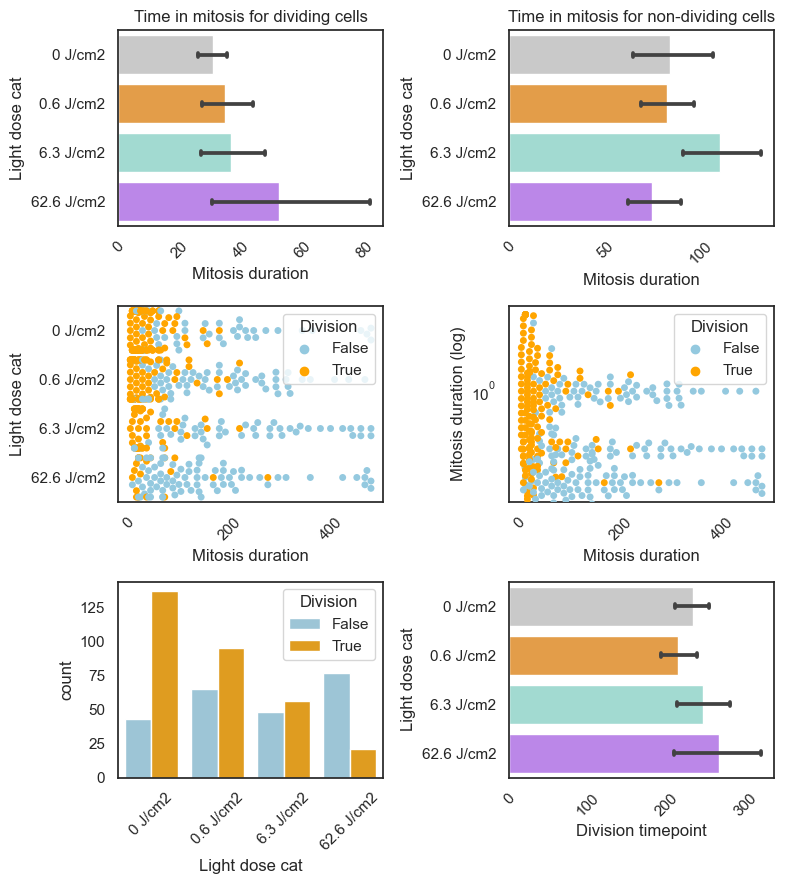

In [15]:
# Read the stored data if needed
data = pd.read_csv(os.path.join(output_dir, "manual_mitosis_counting_categories.csv"))

category_var = "Subcaregory-02"
hue_order = ['0 jcm2', '0.6 jcm2', '6 jcm2', '60 jcm2']
## Add other colours if needed for the conditions.
palette_colours = ['#C9C9C9', '#FC9F30', '#99E3D7', '#BC77F8']

unsynchro_tracking(data, category_var, os.path.join(path2results, "plots"), hue_order, palette_colours=palette_colours)
print(f"The plot has been saved in:")
print(f"{os.path.join(path2results, "plots")}")